# Answer 1 :  Propensity score matching

## 1.1 The Naive Method

We first import and load the data.

In [491]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sbs
from sklearn import linear_model
import networkx as nx


In [492]:
def load_data(filename):
    df = pd.read_csv(filename)
    return df

In [493]:
filename = r'./lalonde.csv'
df = load_data(filename)
df

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940
2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500
3,NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460
4,NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899
5,NSW6,1,22,9,1,0,0,1,0.0,0.0,4056.4940
6,NSW7,1,23,12,1,0,0,0,0.0,0.0,0.0000
7,NSW8,1,32,11,1,0,0,1,0.0,0.0,8472.1580
8,NSW9,1,22,16,1,0,0,0,0.0,0.0,2164.0220
9,NSW10,1,33,12,0,0,1,0,0.0,0.0,12418.0700


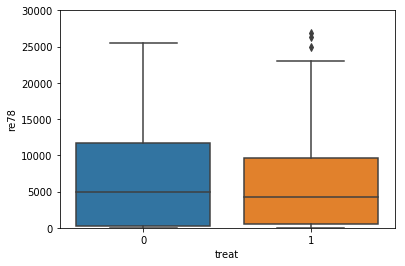

In [494]:
# Extract the two categories.
treat = df[df.treat == 1]
control = df[df.treat == 0]

#Box plot
x = df['treat']
y = df['re78']
ylim = (0,30000)
ax = sbs.boxplot(x=x,y=y)
ax.set(ylim=ylim,)
plt.show()

We limit the y-axis is order to see the mean of the revenues. We see that the mean revenu of the treated group is lower than the mean revenu of the control group. Naively, we conclude that the training program do not increase the revenue of the individual. 

## 1.2 A closer look at the data
The naive method is not analytic and smart. Let's learn more about the distribution by analysing by features.

### ethnicity
The ethnicity is divided into three category: Black, White or Hispanic. Below we compare the distribution of the revenues of the tree categories. 

What is the proportion of the different class of ethnicity in the data ? 

In [495]:
def ethnicity(df):
    # Black
    b = df[df.black == 1]
    # Hispanic
    h = df[df.hispan == 1]
    #White
    w = df[(df.black == 0 )& (df.hispan == 0)]
    return (b,h,w)

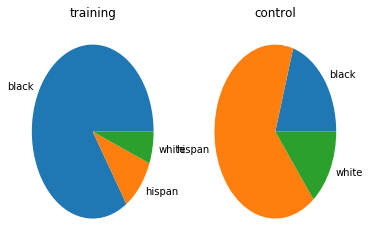

In [496]:
labels_ = ['black', 'hispan' , 'white']

(b_t,h_t,w_t) = ethnicity(treat)
(b_c,h_c,w_c) = ethnicity(control)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)


ax1.pie(x=[b_t.shape[0],w_t.shape[0],h_t.shape[0]],labels = labels_)
ax1.set_title('training')
ax2.pie(x=[b_c.shape[0],w_c.shape[0],h_c.shape[0]],labels = labels_)
ax2.set_title('control')
plt.show()


For the first plot (training) the proportion of black individuel is really hiher than the other. 
The second plot (control) indicate that the hispanic individual is higher than other. We need to keep this in mind when we want to compare each ethny between the control and training group. This constrained will be traited in further section.

In [497]:
def plot_dist(t,c):
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
    sbs.distplot(t['re78'], ax=ax1)
    sbs.distplot(c['re78'], ax=ax2)
    plt.show()
    
def plot_dist_bis(t,c):
    sbs.kdeplot(t)
    sbs.kdeplot(c)
    plt.show()    

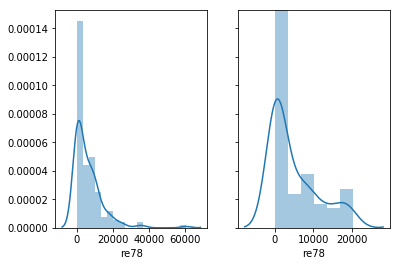

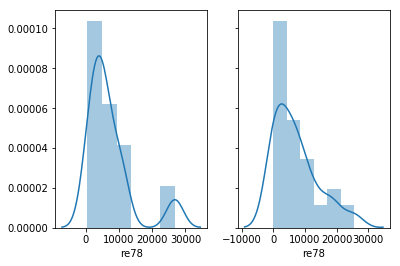

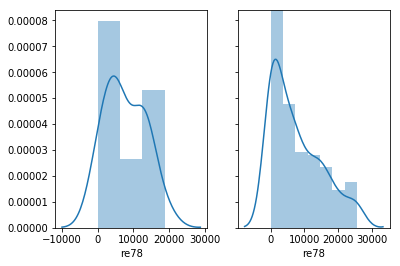

In [498]:
# create df
x = np.linspace(0, 2 * np.pi, 400)
df1 = pd.DataFrame({'x': x, 'y': np.sin(x ** 2)})
df1.index.names = ['obs']
df1.columns.names = ['vars']

idx = np.array(df1.index.tolist(), dtype='float')  # make an array of x-values

# call regplot on each axes
plot_dist(b_t,b_c)
plot_dist(h_t,h_c)
plot_dist(w_t,w_c)


### Degree 
Lets study the trend of individial with a degree

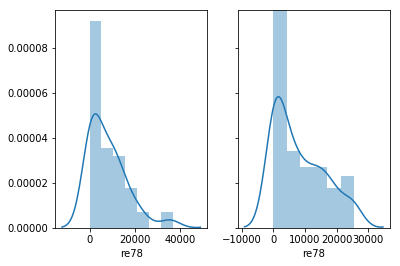

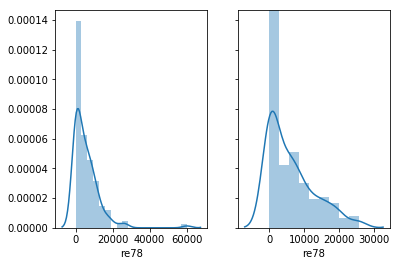

In [499]:
degree_t = treat[treat.nodegree == 0]
not_degree_t = treat[treat.nodegree == 1]

degree_c = control[control.nodegree == 0]
not_degree_c = control[control.nodegree == 1]
plot_dist(degree_t,degree_c)
plot_dist(not_degree_t,not_degree_c)

### Mariage
Let's study the effect on earnings on maried individials.

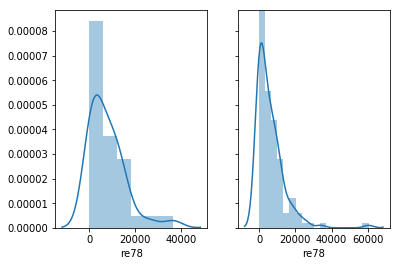

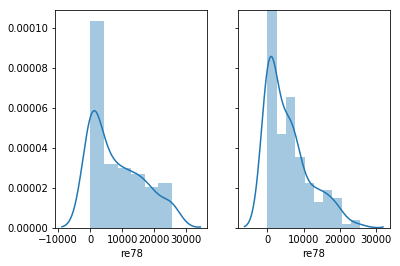

In [500]:
m_t = treat[treat.married == 1]
m_c = treat[treat.married == 0]

not_m_t = control[control.married == 1]
not_m_c = control[control.married == 0]

plot_dist(m_t,m_c)
plot_dist(not_m_t,not_m_c)

### age

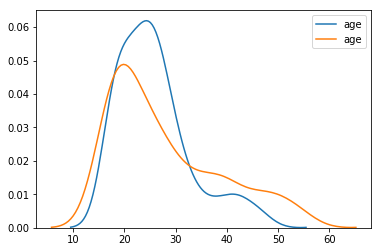

In [501]:
plot_dist_bis(treat['age'], control['age'])


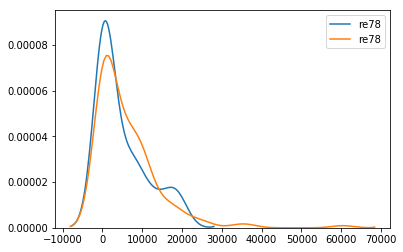

In [502]:
sbs.kdeplot(b_c['re78'])
sbs.kdeplot(b_t['re78'])
plt.show()


### Education year


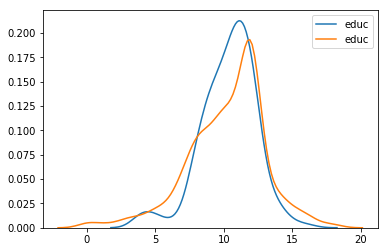

In [503]:
plot_dist_bis(treat['educ'], control['educ'])

## 1.3 A propensity score model

Recall that propensity score compute using the features the probability of recieving a threatment. 

In [504]:
df

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940
2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500
3,NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460
4,NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899
5,NSW6,1,22,9,1,0,0,1,0.0,0.0,4056.4940
6,NSW7,1,23,12,1,0,0,0,0.0,0.0,0.0000
7,NSW8,1,32,11,1,0,0,1,0.0,0.0,8472.1580
8,NSW9,1,22,16,1,0,0,0,0.0,0.0,2164.0220
9,NSW10,1,33,12,0,0,1,0,0.0,0.0,12418.0700


In [505]:
df
logistic = linear_model.LogisticRegression()
x_key= ['age', 'educ', 'black', 'hispan', 'married' , 'nodegree', 're74', 're75', 're78']
y_key= ['treat']
X = df[x_key]
y = df[y_key]
logistic.fit(X,y)

y_pred = logistic.predict_proba(X)
df_y_pred = pd.DataFrame(y_pred).drop(0,axis=1)
df_y_pred = df_y_pred.rename_axis({1 : 'propensity score'}, axis =1)


df_prop = pd.concat([df, df_y_pred],axis=1)
df_prop

/home/remi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,propensity score
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460,0.458074
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940,0.151980
2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500,0.750966
3,NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460,0.674020
4,NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899,0.670590
5,NSW6,1,22,9,1,0,0,1,0.0,0.0,4056.4940,0.711254
6,NSW7,1,23,12,1,0,0,0,0.0,0.0,0.0000,0.649616
7,NSW8,1,32,11,1,0,0,1,0.0,0.0,8472.1580,0.660434
8,NSW9,1,22,16,1,0,0,0,0.0,0.0,2164.0220,0.583820
9,NSW10,1,33,12,0,0,1,0,0.0,0.0,12418.0700,0.086735


## 1.4 Matching

### Creation of the graph

In [506]:
df_prop.iloc[0]

id                      NSW1
treat                      1
age                       37
educ                      11
black                      1
hispan                     0
married                    1
nodegree                   1
re74                       0
re75                       0
re78                 9930.05
propensity score    0.458074
Name: 0, dtype: object

In [507]:
nodes = [df_prop.iloc[i] for i in range(len(df_prop))]
nodes_t = [n for n in nodes if n['treat'] == 1]
nodes_c = [n for n in nodes if n['treat'] == 0]

G = nx.Graph()

for nt in nodes_t:
    for nc in nodes_c:
        G.add_edge(nt['id'], nc['id'], weight=1 - abs(nt['propensity score'] - nc['propensity score']))
        
matching = nx.max_weight_matching(G)#nx.bipartite.maximum_matching(G)
        
list(matching.items())[:20]

[('NSW92', 'PSID79'),
 ('PSID392', 'NSW62'),
 ('NSW53', 'PSID280'),
 ('PSID374', 'NSW78'),
 ('NSW34', 'PSID300'),
 ('PSID373', 'NSW27'),
 ('PSID6', 'NSW109'),
 ('NSW184', 'PSID407'),
 ('PSID231', 'NSW94'),
 ('NSW79', 'PSID419'),
 ('PSID336', 'NSW83'),
 ('NSW83', 'PSID336'),
 ('PSID221', 'NSW70'),
 ('NSW68', 'PSID270'),
 ('PSID167', 'NSW129'),
 ('NSW129', 'PSID167'),
 ('PSID263', 'NSW167'),
 ('NSW167', 'PSID263'),
 ('PSID266', 'NSW88'),
 ('NSW6', 'PSID352')]

In [508]:
kept_nodes = []

for a, b in list(matching.items()):
    kept_nodes.append(a)
    kept_nodes.append(b)
    
kept_nodes = list(set(kept_nodes))
kept_nodes[:20]

['NSW74',
 'PSID417',
 'NSW178',
 'PSID367',
 'PSID389',
 'NSW52',
 'PSID105',
 'NSW138',
 'NSW16',
 'NSW51',
 'NSW41',
 'PSID231',
 'PSID218',
 'PSID156',
 'NSW126',
 'NSW15',
 'PSID252',
 'PSID189',
 'PSID386',
 'PSID270']

In [509]:
df_matched = df_prop[df_prop['id'].apply(lambda x: x in kept_nodes)]
df_matched = pd.concat([df_matched, df_matched['id'].apply(lambda x: matching[x])], axis=1)
df_matched.columns.values[12] = 'matching'
df_matched

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,propensity score,matching
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460,0.458074,PSID357
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940,0.151980,PSID241
2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500,0.750966,PSID388
3,NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460,0.674020,PSID191
4,NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899,0.670590,PSID124
5,NSW6,1,22,9,1,0,0,1,0.0,0.0,4056.4940,0.711254,PSID352
6,NSW7,1,23,12,1,0,0,0,0.0,0.0,0.0000,0.649616,PSID193
7,NSW8,1,32,11,1,0,0,1,0.0,0.0,8472.1580,0.660434,PSID385
8,NSW9,1,22,16,1,0,0,0,0.0,0.0,2164.0220,0.583820,PSID206
9,NSW10,1,33,12,0,0,1,0,0.0,0.0,12418.0700,0.086735,PSID394


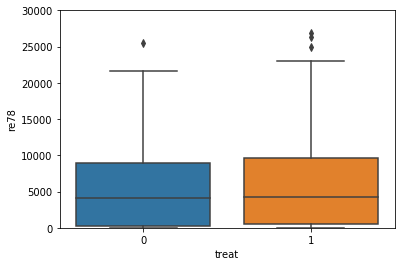

In [510]:
# Extract the two categories.
treat = df_matched[df_matched.treat == 1]
control = df_matched[df_matched.treat == 0]

#Box plot
x = df_matched['treat']
y = df_matched['re78']
ylim = (0,30000)
ax = sbs.boxplot(x=x,y=y)
ax.set(ylim=ylim,)
plt.show()

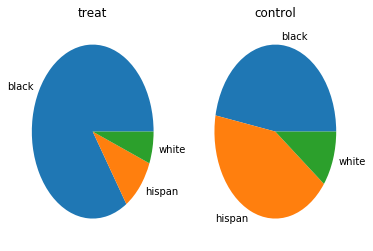

In [511]:
labels_ = ['black', 'hispan' , 'white']

(b_t,h_t,w_t) = ethnicity(treat)
(b_c,h_c,w_c) = ethnicity(control)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)


ax1.pie(x=[b_t.shape[0],w_t.shape[0],h_t.shape[0]],labels = labels_)
ax1.set_title('treat')
ax2.pie(x=[b_c.shape[0],w_c.shape[0],h_c.shape[0]],labels = labels_)
ax2.set_title('control')
plt.show()

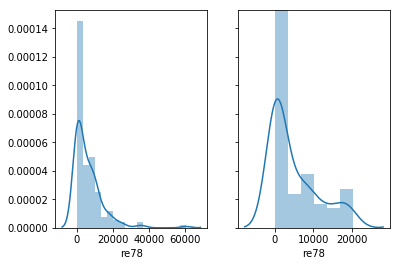

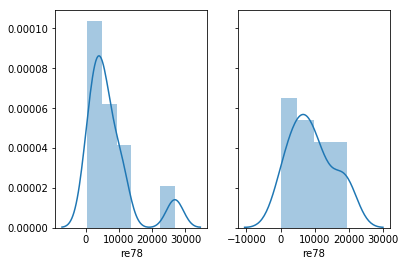

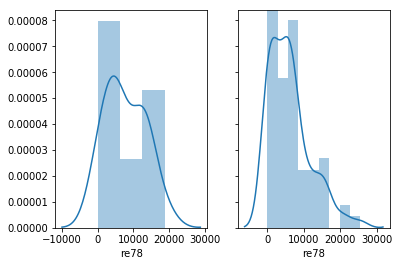

In [512]:
# create df
x = np.linspace(0, 2 * np.pi, 400)
df1 = pd.DataFrame({'x': x, 'y': np.sin(x ** 2)})
df1.index.names = ['obs']
df1.columns.names = ['vars']

idx = np.array(df1.index.tolist(), dtype='float')  # make an array of x-values

# call regplot on each axes
plot_dist(b_t,b_c)
plot_dist(h_t,h_c)
plot_dist(w_t,w_c)

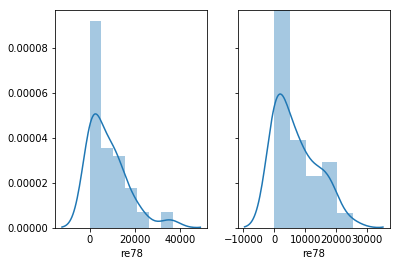

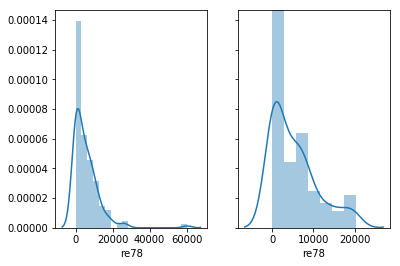

In [513]:
degree_t = treat[treat.nodegree == 0]
not_degree_t = treat[treat.nodegree == 1]

degree_c = control[control.nodegree == 0]
not_degree_c = control[control.nodegree == 1]
plot_dist(degree_t,degree_c)
plot_dist(not_degree_t,not_degree_c)

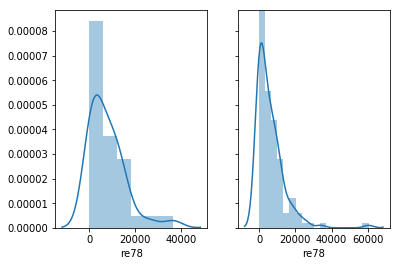

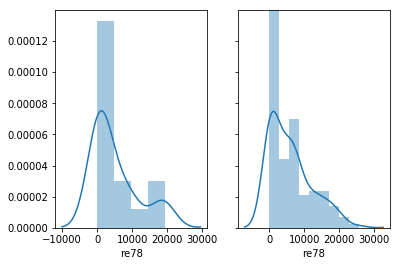

In [514]:
m_t = treat[treat.married == 1]
m_c = treat[treat.married == 0]

not_m_t = control[control.married == 1]
not_m_c = control[control.married == 0]

plot_dist(m_t,m_c)
plot_dist(not_m_t,not_m_c)

## 1.5 Balancing

In [549]:
df1 = df_matched[['id', 'black', 'hispan', 'matching', 'treat']]
df2 = df_matched[['id', 'black', 'hispan', 'matching', 'treat']]
df1.columns = ['matching', 'black', 'hispan', 'id', 'treat']
x = df1.merge(df2, on='id')

ids = x[
    ~(((x['treat_x'] == 1) &
     (x['black_x'] == 1) &
     (x['hispan_y'] == 0) &
     (x['black_y'] == 0)) |
    ((x['treat_x'] == 0) &
     (x['black_y'] == 1) &
     (x['hispan_x'] == 0) &
     (x['black_x'] == 0)))
 ]['id'].tolist()

ids

['PSID241',
 'PSID388',
 'PSID191',
 'PSID352',
 'PSID385',
 'PSID394',
 'PSID268',
 'PSID5',
 'PSID48',
 'PSID179',
 'PSID401',
 'PSID345',
 'PSID331',
 'PSID355',
 'PSID122',
 'PSID192',
 'PSID399',
 'PSID256',
 'PSID373',
 'PSID178',
 'PSID218',
 'PSID187',
 'PSID260',
 'PSID300',
 'PSID326',
 'PSID356',
 'PSID225',
 'PSID66',
 'PSID264',
 'PSID211',
 'PSID291',
 'PSID242',
 'PSID15',
 'PSID368',
 'PSID386',
 'PSID406',
 'PSID376',
 'PSID234',
 'PSID110',
 'PSID408',
 'PSID354',
 'PSID412',
 'PSID217',
 'PSID99',
 'PSID290',
 'PSID134',
 'PSID392',
 'PSID269',
 'PSID157',
 'PSID270',
 'PSID308',
 'PSID277',
 'PSID59',
 'PSID381',
 'PSID189',
 'PSID159',
 'PSID251',
 'PSID158',
 'PSID374',
 'PSID419',
 'PSID428',
 'PSID336',
 'PSID400',
 'PSID153',
 'PSID266',
 'PSID139',
 'PSID337',
 'PSID231',
 'PSID265',
 'PSID249',
 'PSID24',
 'PSID417',
 'PSID375',
 'PSID46',
 'PSID367',
 'PSID426',
 'PSID228',
 'PSID6',
 'PSID227',
 'PSID69',
 'PSID366',
 'PSID358',
 'PSID267',
 'PSID411',
 'PS

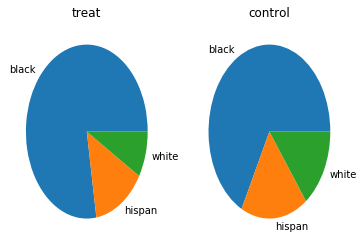

In [550]:
df_balanced = df_matched[df_matched['id'].apply(lambda x: x in ids)]

treat = df_balanced[df_balanced.treat == 1]
control = df_balanced[df_balanced.treat == 0]

labels_ = ['black', 'hispan' , 'white']

(b_t,h_t,w_t) = ethnicity(treat)
(b_c,h_c,w_c) = ethnicity(control)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)


ax1.pie(x=[b_t.shape[0],w_t.shape[0],h_t.shape[0]],labels = labels_)
ax1.set_title('treat')
ax2.pie(x=[b_c.shape[0],w_c.shape[0],h_c.shape[0]],labels = labels_)
ax2.set_title('control')
plt.show()

## 1.6 Final Analysis

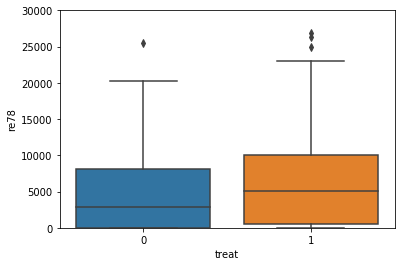

In [553]:
#Box plot
x = df_balanced['treat']
y = df_balanced['re78']
ylim = (0,30000)
ax = sbs.boxplot(x=x,y=y)
ax.set(ylim=ylim,)
plt.show()